<a href="https://colab.research.google.com/github/utsabsarkar12/Machine_Learning/blob/main/MNIST_Handwritten_Digit_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Dataset Acquisition
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 2. Data Loading into Pandas DataFrame
# Flatten 28x28 images into 784 features
X_train = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
y_train = pd.Series(y_train).astype("int")

X_test = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))
y_test = pd.Series(y_test).astype("int")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [ ]:
# 3. Data Exploration
print("\n--- Data Exploration ---")
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
print("Target classes:", sorted(y_train.unique()))


--- Data Exploration ---
Number of samples: 60000
Number of features: 784
Target classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


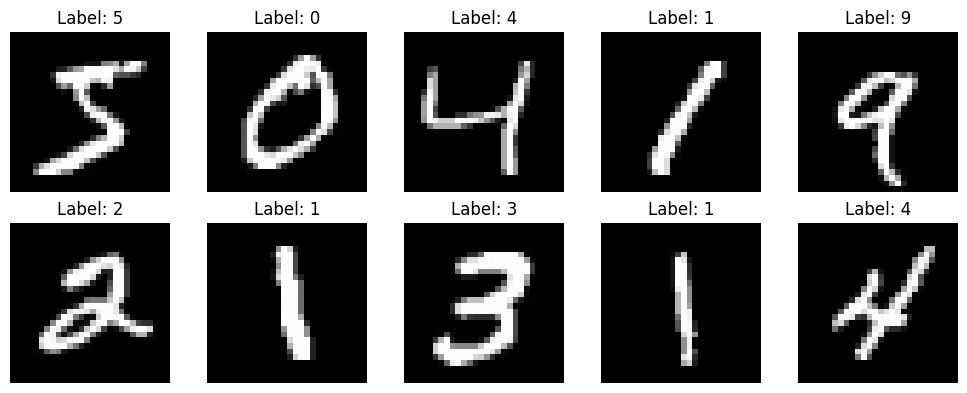

In [ ]:
# 4. Data Visualization
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Normalize/scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 6. Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC()
tree = DecisionTreeClassifier()

# Train models
log_reg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
tree.fit(X_train, y_train)  # Trees don’t need scaling

DecisionTreeClassifier()

In [ ]:
# 7. Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_log = {"C": [0.01, 0.1, 1, 10]}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_log, cv=3)
grid_log.fit(X_train_scaled, y_train)

# SVM
param_svm = {"C": [1, 10], "kernel": ["rbf", "linear"]}
grid_svm = GridSearchCV(SVC(), param_svm, cv=3)
grid_svm.fit(X_train_scaled, y_train)

# Decision Tree
param_tree = {"max_depth": [10, 20, 30]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, cv=3)
grid_tree.fit(X_train, y_train)

print("\n--- Best Hyperparameters ---")
print("Best Logistic Regression Params:", grid_log.best_params_)
print("Best SVM Params:", grid_svm.best_params_)
print("Best Decision Tree Params:", grid_tree.best_params_)


--- Best Hyperparameters ---
Best Logistic Regression Params: {'C': 0.01}
Best SVM Params: {'C': 10, 'kernel': 'rbf'}
Best Decision Tree Params: {'max_depth': 20}


In [ ]:
# 8. Training Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(model, X_data, y_data, model_name):
    print(f"\n{model_name} Training Evaluation:")
    y_pred = model.predict(X_data)
    print("Accuracy:", accuracy_score(y_data, y_pred))
    print("Classification Report:\n", classification_report(y_data, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_data, y_pred))

evaluate_model(grid_log.best_estimator_, X_train_scaled, y_train, "Logistic Regression")
evaluate_model(grid_svm.best_estimator_, X_train_scaled, y_train, "SVM")
evaluate_model(grid_tree.best_estimator_, X_train, y_train, "Decision Tree")


Logistic Regression Training Evaluation:
Accuracy: 0.9361
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5923
           1       0.96      0.98      0.97      6742
           2       0.94      0.92      0.93      5958
           3       0.92      0.91      0.92      6131
           4       0.94      0.94      0.94      5842
           5       0.91      0.90      0.91      5421
           6       0.96      0.96      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.90      0.90      5851
           9       0.91      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000

Confusion Matrix:
 [[5780    1   12    9   10   30   33    5   40    3]
 [   1 6583   32   15    6   25    3   12   54   11]
 [  26   44 5460   84   64   18  

In [ ]:
# 9. Testing Evaluation (with Bootstrapping)
from sklearn.utils import resample

def bootstrap_evaluation(model, X_test, y_test, n_iterations=200):
    acc_scores, prec_scores, rec_scores = [], [], []

    for _ in range(n_iterations):
        X_samp, y_samp = resample(X_test, y_test)
        y_pred = model.predict(X_samp)

        acc_scores.append(accuracy_score(y_samp, y_pred))
        cm = confusion_matrix(y_samp, y_pred)
        prec_scores.append(np.mean(np.diag(cm) / np.sum(cm, axis=0)))
        rec_scores.append(np.mean(np.diag(cm) / np.sum(cm, axis=1)))

    def ci(scores):
        return np.mean(scores), np.percentile(scores, 2.5), np.percentile(scores, 97.5)

    print("Bootstrap Accuracy (Mean, 95% CI):", ci(acc_scores))
    print("Bootstrap Precision (Mean, 95% CI):", ci(prec_scores))
    print("Bootstrap Recall (Mean, 95% CI):", ci(rec_scores))

print("\n--- Testing Evaluation (Bootstrap) ---")
bootstrap_evaluation(grid_log.best_estimator_, X_test_scaled, y_test)
bootstrap_evaluation(grid_svm.best_estimator_, X_test_scaled, y_test)
bootstrap_evaluation(grid_tree.best_estimator_, X_test, y_test)

In [ ]:
# 10. Model Comparison
models = {
    "Logistic Regression": grid_log.best_estimator_,
    "SVM": grid_svm.best_estimator_,
    "Decision Tree": grid_tree.best_estimator_,
}

print("\n--- Model Comparison ---")
for name, model in models.items():
    train_acc = accuracy_score(
        y_train, model.predict(X_train_scaled if name != "Decision Tree" else X_train)
    )
    test_acc = accuracy_score(
        y_test, model.predict(X_test_scaled if name != "Decision Tree" else X_test)
    )

    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy : {test_acc:.4f}")

    if train_acc - test_acc > 0.1:
        print(" ⚠️ Potential Overfitting")
    elif test_acc < 0.8:
        print(" ⚠️ Potential Underfitting")
    else:
        print(" ✅ Good Generalization")